# Using [Intake-ESM's](https://intake-esm.readthedocs.io/en/latest/) New Derived Variable Functionality

Last week, [Anderson Banihirwe](https://github.com/andersy005) added a new feature to intake-esm, enabling users to add "derived variables" to catalogs! This is an exciting addition, and although this has not been included in a release yet, you are welcome to test out the functionality!

## What is a "Derived Variable"
A derived variable in this case is a variable which can be derived using variables within some data catalog. The basic assumption is that they can be included **in the same dataset** (which ***could be extended*** to be able to work with variables from multiple datasets). This means that variables will need to be **on the same grid with the same dimensionality**.

An example of a derived variable could be temperature in degrees Fahrenheit. Often times, climate model models write temperature in Celsius or Kelvin, but the user may want degrees Fahrenheit!

Often times, this workflow consists of the following:
* Load the data within the catalog
* Apply some function to the loaded datasets
* Plot the output

But what if we could couple those first two steps? What if we could have some set of **variable definitions**, consisting of variable requirements, such as `dependent variables`, and a function which derives the quantity. This is what the `derived_variable` funtionality offers in `intake-esm`! This enables users to share a "registry" of derived variables across catalogs!

Let's get started with an example!

## Installing the Development Version of Intake-ESM
Since this has not yet been released in a version of Intake-ESM, you can install the development version using the following:

```bash
pip install git+https://github.com/intake/intake-esm.git
```

## Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
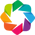

In [116]:
import holoviews as hv
import hvplot
import hvplot.xarray
import intake
import numpy as np
from distributed import Client
from intake_esm.derived import DerivedVariableRegistry
from ncar_jobqueue import NCARCluster

hv.extension('bokeh')

## Spin up a Dask Cluster

In [54]:
cluster = NCARCluster()
cluster.scale(10)
client = Client(cluster)
client

/glade/work/mgrover/miniconda3/envs/cesm-collections-dev/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40217 instead
  warnings.warn(


<Client: 'tcp://10.12.206.54:38580' processes=0 threads=0, memory=0 B>

## How to add a Derived Variable
Let's compute a derived variable - wind speed! This can be derived from using the zonal (`U`) and meridional (`V`) components of the wind.

In [28]:
def calc_wind_speed(u, v):
    return np.sqrt(u ** 2 + v ** 2)

### Creating our Derived Variable Registry
We need to instantiate our derived variable registry, which will store our derived variable information! We use the variable `dvr` for this (**D**erived**V**ariable**R**egistry).

In [89]:
dvr = DerivedVariableRegistry()

In order to register this derived variable we need to add a [decorator](https://www.python.org/dev/peps/pep-0318/) for our function, as seen below. This allows us to define our derived variable, dependent variables, and the function associated with the calculation.

In [90]:
@dvr.register(variable='wind_speed', dependent_variables=['U', 'V'])
def calc_wind_speed(ds):
    ds['wind_speed'] = np.sqrt(ds.U ** 2 + ds.V ** 2)
    return ds

You'll notice `dvr` now has a registered variable, `wind_speed`, which was defined in the cell above!

In [91]:
dvr

DerivedVariableRegistry({'wind_speed': DerivedVariable(func=<function calc_wind_speed at 0x2b84d46c84c0>, variable='wind_speed', dependent_variables=['U', 'V'])})

## Read in Data with our Registry
In this case, we will use data from the CESM Large Ensemble. We load in our derived variable catalog using the `registry` argument.

In [92]:
data_catalog = intake.open_esm_datastore(
    'https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/intake-catalogs/aws-cesm1-le.json',
    registry=dvr,
)

You'll notice we have a new field - `derived_variable` which has 1 unique value.

In [93]:
data_catalog

Let's also subset for monthly frequency, as well as the 20th century (20C) and RCP 8.5 (RCP85) experiments.

In [94]:
catalog_subset = data_catalog.search(
    variable=['wind_speed'], frequency='monthly', experiment=['20C', 'RCP85']
)

catalog_subset

### Calling `to_dataset_dict` to Load in the Data
We load in the data, which lazily adds our calculation for `wind_speed` to the datasets!

In [95]:
dsets = catalog_subset.to_dataset_dict(
    xarray_open_kwargs={'backend_kwargs': {'storage_options': {'anon': True}}}
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.frequency'


In [99]:
ds = dsets['atm.RCP85.monthly']
ds

<xarray.Dataset>
Dimensions:     (member_id: 40, time: 1140, lev: 30, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * member_id   (member_id) int64 1 2 3 4 5 6 7 8 ... 34 35 101 102 103 104 105
  * time        (time) object 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds   (time, nbnd) object dask.array<chunksize=(1140, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    U           (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 18, 30, 192, 288), meta=np.ndarray>
    V           (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 18, 30, 192, 288), meta=np.ndarray>
    wind_speed  (member_id, time, lev, lat, lon) float32 dask.array<chunksize=(1, 18, 30, 192, 288), meta=np.ndarray>
Attributes: (12/21)
    Conventions:                       CF-1.0
    NCO:                               4.3.4
    Version:                           $Name$
    host:                              tcs-f02n07
    important_note:                    This data is part of the project 'Blin...
    initial_file:                      b.e11.B20TRC5CNBDRD.f09_g16.105.cam.i....
    ...                                ...
    intake_esm_attrs/vertical_levels:  30.0
    intake_esm_attrs/spatial_domain:   global
    intake_esm_attrs/units:            m/s
    intake_esm_attrs/start_time:       2006-01-16 12:00:00
    intake_esm_attrs/end_time:         2100-12-16 12:00:00
    intake_esm_dataset_key:            atm.RCP85.monthly

## Apply an Annual Mean Calculation
Let's apply an annual average to the data - since all the years are 365 days long, we do not need any special weighting

In [110]:
annual_mean = ds.groupby('time.year').mean('time')

## Plot the Output
We use `hvPlot` here to plot a global map, selecting only the bottom 8 levels of the atmosphere.

In [115]:
annual_mean.isel(lev=range(-8, 0)).wind_speed.hvplot.quadmesh(
    x='lon',
    y='lat',
    geo=True,
    rasterize=True,
    cmap='viridis',
    coastline=True,
    title='Wind Speed (m/s)',
)

:DynamicMap   [year,member_id,lev]
   :Overlay
      .Image.I     :Image   [lon,lat]   (wind_speed)
      .Coastline.I :Feature   [Longitude,Latitude]